# Timeseries Analysis for Model Calibration

intro


In the subsequent analysis, we utilize a suite of Python libraries to aid in data manipulation, statistical analysis, and visualization. The table below offers a brief overview of each library and its primary function:

- **`pandas (pd)`**: Used for data manipulation and analysis with structures like DataFrames and Series.
- **`numpy (np)`**: Provides support for arrays and mathematical functions for numerical computing.
- **`scipy.signal.detrend`**: Removes linear trends from signals, making non-stationary series stationary.
- **`scipy.stats.norm`**: Provides functions for working with normal (Gaussian) distributions.
- **`statsmodels.tsa.stattools.acf`**: Computes the autocorrelation function to identify patterns in time-series data.
- **`matplotlib.pyplot (plt)`**: A MATLAB-like interface for creating plots and visualizations.
- **`matplotlib.gridspec.GridSpec`**: Allows for complex visual layouts by defining grid structures for subplots.
- **`functions.Hill_pro`**: Computes the Hill estimators distribution of data up to a given percentile, used for heavy-tail distribution analysis.
- **`warnings`**: Suppresses warning messages to ensure clean outputs in notebooks or reports.


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy.signal import detrend
from scipy.stats import norm
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# from functions import Hill_pro
import warnings

# Suppress warnings in all notebook ouputs
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


## Model Calibration and Statistical Moments

Text about statistical Moments 


## Data

what Data for what? => Wallets => Inflow waves of the models
s. th about bitcoin as reference

Data Source Description:



### Import

**Import BTC Price Data**

In [42]:
asset = pd.read_csv("../data/BTC/bitcoin-prices.csv")
asset = asset.reindex(index=asset.index[::-1])
asset.reset_index(inplace=True, drop=True)
asset['Date'] =  pd.to_datetime(asset['Date'])

# Show imported data for inspection
print('Data imported ... containing ' + str(len(asset)) + ' observations (rows)')
print('Start: ' + str(asset.index[0]) + ' | End: ' + str(asset.index[-1]))
print('Columns: ' + str(list(asset.columns)))

Data imported ... containing 4581 observations (rows)
Start: 0 | End: 4580
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']


**Import BTC Wallets Data**

In [41]:
btcwlt = pd.read_excel('../data/BTC/bitcoin-adresses.xlsx')
btcwlt.set_index(pd.to_datetime(btcwlt.Time), inplace=True, drop=True)
btcwlt = btcwlt.drop('Time', axis=1)

# Show imported data for inspection
print('Data imported ... containing ' + str(len(btcwlt)) + ' observations (rows)')
print('Start: ' + str(btcwlt.index[0]) + ' | End: ' + str(btcwlt.index[-1]))
print('Columns: ' + str(list(btcwlt.columns)))

Data imported ... containing 5161 observations (rows)
Start: 2009-01-03 00:00:00 | End: 2023-02-19 00:00:00
Columns: ['Close', 'Active', 'Count']



### Clean and Select

Select Date 


In [43]:
# Narrow down data to the desired time period
start = asset['Date'] >= pd.to_datetime('2011-12-31')
stop = asset['Date'] < pd.to_datetime('2023-01-01')
asset = asset[start]
asset = asset[stop]

# Show imported data for inspection
print('Data imported ... containing ' + str(len(asset)) + ' observations (rows)')
print('Start: ' + str(asset['Date'].iloc[0]) + ' | End: ' + str(asset['Date'].iloc[-1]))
print('Columns: ' + str(list(asset.columns)))

Data imported ... containing 4019 observations (rows)
Start: 2011-12-31 00:00:00 | End: 2022-12-31 00:00:00
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']


Group Wallet Data to Weekly

In [6]:
# Group data by week and calculate weekly mean values
gw = btcwlt.groupby(pd.Grouper(freq='W'))
wltW = gw.mean()

# Narrow down the data set to the desired time period
wltW = wltW[pd.Timestamp('2012-01-01'):pd.Timestamp('2023-01-01')]

# Show calculated weekly data for inspection
print('Weekly data frame created from calculated mean values ... ' + str(len(wltW)) + ' observations (rows)')
print('Start: ' + str(wltW.index[0]) + ' | End: ' + str(wltW.index[-1]))
print('Columns: ' + str(list(wltW.columns)))

Weekly data frame created from calculated mean values ... 575 observations (rows)
Start: 2012-01-01 00:00:00 | End: 2023-01-01 00:00:00
Columns: ['Close', 'Active', 'Count']


### Data Frames

show data frames



## Analysis



### Price and Wallets


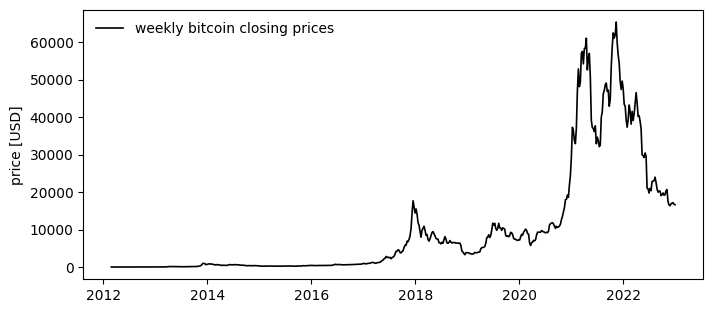

In [21]:
fig1, ax1 = plt.subplots(figsize=(8, 3.5))  # Roughly half the height of the original figure size
ax1.plot(wltW.Close, color='black', linewidth=1.2, label='weekly bitcoin closing prices')
ax1.set_ylabel('price [USD]')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper left', frameon=0)
plt.show()

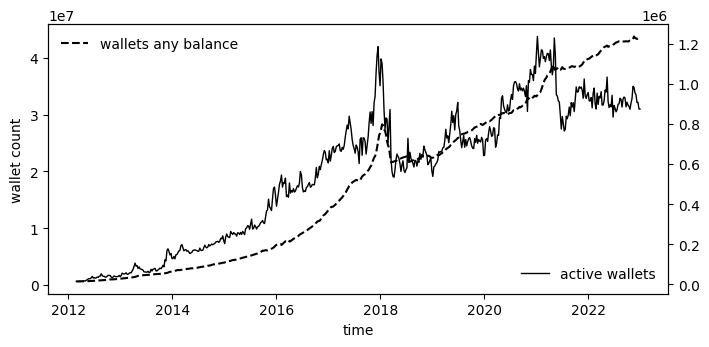

In [22]:
fig2, ax2 = plt.subplots(figsize=(8, 3.5))  # Roughly half the height of the original figure size
ax2.plot(wltW.Count, color='black', linewidth=1.5, linestyle='dashed', label='wallets any balance')
ax2.set_ylabel('wallet count')

# Create a twin y-axis for the subplot
ax22 = ax2.twinx()
ax22.plot(wltW.Active, color='black', linewidth=1, label='active wallets')
ax2.set_xlabel('time')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper left', frameon=0)
handles, labels = ax22.get_legend_handles_labels()
ax22.legend(handles, labels, loc='lower right', frameon=0)
plt.show()

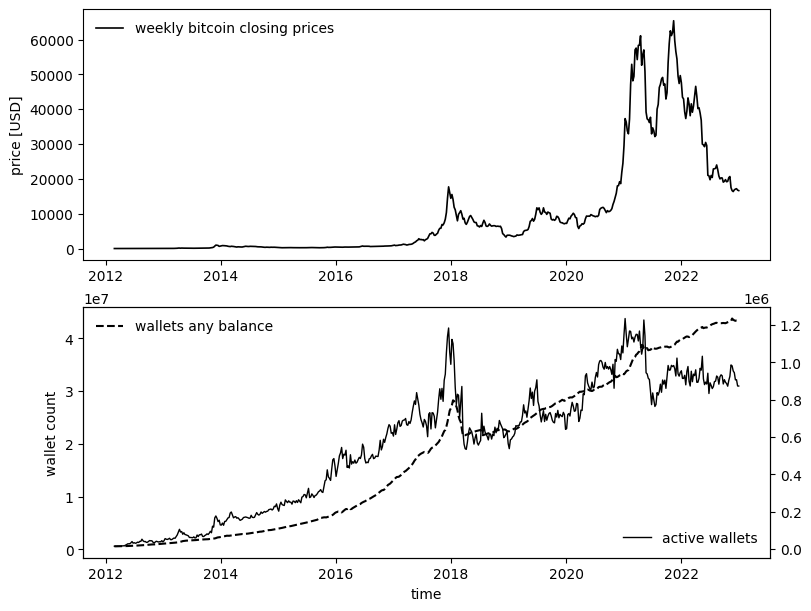

In [24]:
fig = plt.figure(figsize=(8, 6), constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)

# Recreate ax1
ax1_new = fig.add_subplot(gs[0, :])
ax1_new.plot(wltW.Close, color='black', linewidth=1.2, label='weekly bitcoin closing prices')
ax1_new.set_ylabel('price [USD]')
handles, labels = ax1_new.get_legend_handles_labels()
ax1_new.legend(handles, labels, loc='upper left', frameon=0)

# Recreate ax2 and ax22
ax2_new = fig.add_subplot(gs[1, :])
ax2_new.plot(wltW.Count, color='black', linewidth=1.5, linestyle='dashed', label='wallets any balance')
ax2_new.set_ylabel('wallet count')
ax22_new = ax2_new.twinx()
ax22_new.plot(wltW.Active, color='black', linewidth=1, label='active wallets')
ax2_new.set_xlabel('time')
handles, labels = ax2_new.get_legend_handles_labels()
ax2_new.legend(handles, labels, loc='upper left', frameon=0)
handles, labels = ax22_new.get_legend_handles_labels()
ax22_new.legend(handles, labels, loc='lower right', frameon=0)

plt.show()


### Log Price

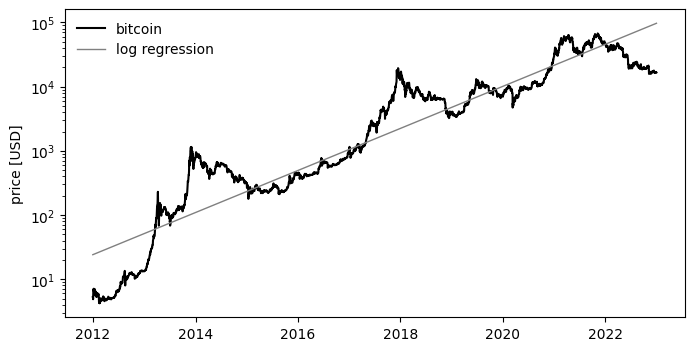

In [44]:
asset['logPrice'] = np.log(asset.Close)

reg = np.polyfit(asset.index, np.log(asset.Close), deg=1)
exp = np.exp(reg[1]) * np.exp(reg[0]) ** asset.index
asset['logfit'] = exp
asset.set_index(pd.to_datetime(asset['Date']), inplace=True)

fig0, ax0 = plt.subplots(figsize=(8, 4))
ax0.plot(asset.Close, color='black', linewidth=1.5, label='bitcoin')
ax0.plot(asset.logfit, color='gray', linewidth=1, label='log regression')
ax0.set_ylabel('price [USD]')
ax0.set_yscale('log')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, loc='upper left', frameon=0)
plt.show()



### Differences (log price & Wallets)



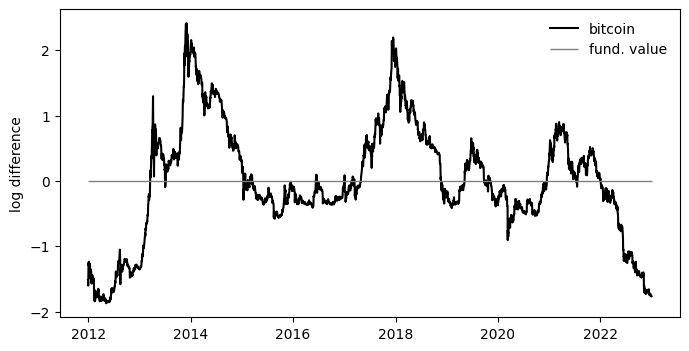

In [45]:
asset['logDiff'] = detrend(asset.logPrice)
asset.set_index(pd.to_datetime(asset['Date']), inplace=True)

fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(asset.logDiff, color='black', linewidth=1.5, label='bitcoin')
ax1.hlines(y=0, xmin=pd.to_datetime('2012-01-01'), xmax=pd.to_datetime('2023-01-01'), linewidth=1, color='grey', label='fund. value')
ax1.set_ylabel('log difference')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right', frameon=0)
plt.show()

- Distortion _D_

Mean of absolute difference between _log price_ and _log fundamental value_

In [46]:
d = np.mean(abs(asset['logDiff']))
D = round(d, 5)

print('Distortion: ' + str(D))

Distortion: 0.66847


Wallets

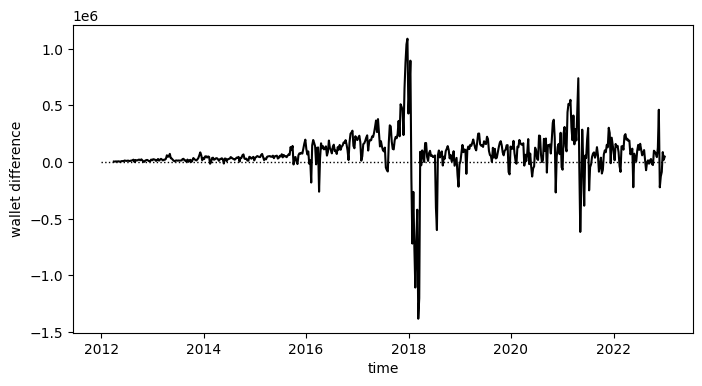

In [50]:
wltW['Wdiff'] = wltW.Count.diff().rolling(1).sum()

fig3, ax3 = plt.subplots(figsize=(8, 4))
ax3.plot(wltW.Wdiff, color='black', linewidth=1.5)
ax3.hlines(y=0, xmin=pd.to_datetime('2012-01-01'), xmax=pd.to_datetime('2023-01-01'), linewidth=1, color='black', linestyle='dotted')
ax3.set_ylabel('wallet difference')
ax3.set_xlabel('time')
plt.show()



### Returns

Plot


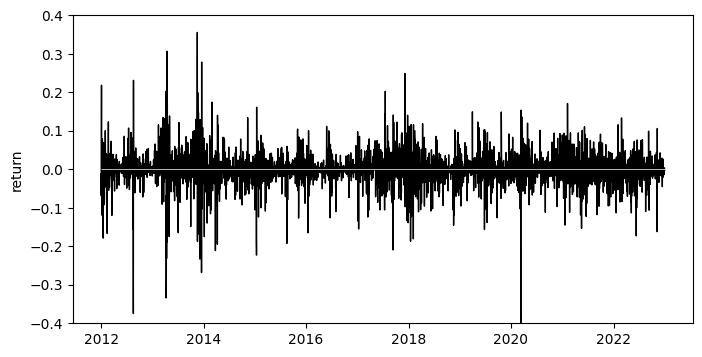

In [48]:
asset['Returns'] = asset.logDiff.diff()

fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(asset.Returns, color='black', linewidth=1)
ax2.hlines(y=0, xmin=pd.to_datetime('2012-01-01'), xmax=pd.to_datetime('2023-01-01'), linewidth=0.5, color='white')
ax2.set_ylim([-.4, .4])
ax2.set_ylabel('return')
plt.show()

- Volatility _V_

Average Value of absolute Returns

In [51]:
v = np.mean(abs(asset['Returns']))
V = round(v, 5)

print('Volatility: ' + str(V)) 

Volatility: 0.02693



Big Picture Plot


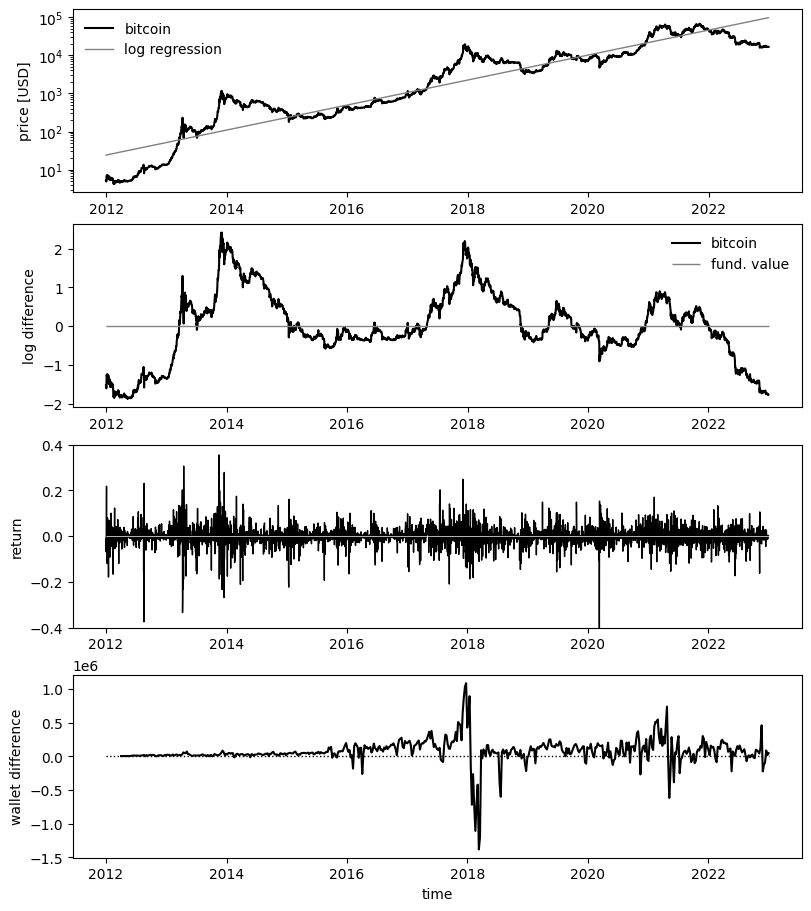

In [53]:
# Step 5
fig = plt.figure(figsize=(8, 9), constrained_layout=True)
gs = GridSpec(4, 2, figure=fig)

# Recreate ax0
ax0_new = fig.add_subplot(gs[0, :])
ax0_new.plot(asset.Close, color='black', linewidth=1.5, label='bitcoin')
ax0_new.plot(asset.logfit, color='gray', linewidth=1, label='log regression')
ax0_new.set_ylabel('price [USD]')
ax0_new.set_yscale('log')
handles, labels = ax0_new.get_legend_handles_labels()
ax0_new.legend(handles, labels, loc='upper left', frameon=0)

# Recreate ax1
ax1_new = fig.add_subplot(gs[1, :])
ax1_new.plot(asset.logDiff, color='black', linewidth=1.5, label='bitcoin')
ax1_new.hlines(y=0, xmin=pd.to_datetime('2012-01-01'), xmax=pd.to_datetime('2023-01-01'), linewidth=1, color='grey', label='fund. value')
ax1_new.set_ylabel('log difference')
handles, labels = ax1_new.get_legend_handles_labels()
ax1_new.legend(handles, labels, loc='upper right', frameon=0)

# Recreate ax2
ax2_new = fig.add_subplot(gs[2, :])
ax2_new.plot(asset.Returns, color='black', linewidth=1)
ax2_new.hlines(y=0, xmin=pd.to_datetime('2012-01-01'), xmax=pd.to_datetime('2023-01-01'), linewidth=0.5, color='white')
ax2_new.set_ylim([-.4, .4])
ax2_new.set_ylabel('return')

# Recreate ax3
ax3_new = fig.add_subplot(gs[3, :])
ax3_new.plot(wltW.Wdiff, color='black', linewidth=1.5)
ax3_new.hlines(y=0, xmin=pd.to_datetime('2012-01-01'), xmax=pd.to_datetime('2023-01-01'), linewidth=1, color='black', linestyle='dotted')
ax3_new.set_ylabel('wallet difference')
ax3_new.set_xlabel('time')

plt.show()



### disttribustion of returns
Norm distribution
Normalized returns
plot


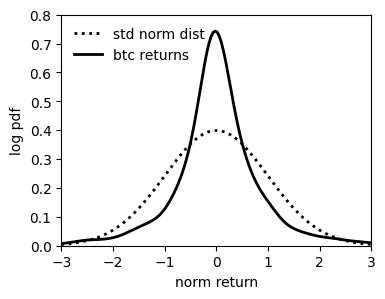

In [57]:
asset['normReturns']= asset['Returns'] / asset.Returns.std()

x = np.linspace(-3, 3, 1000) 
y = 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

fig5, ax5 = plt.subplots(figsize=(4, 3))

ax5.plot(x, y, linewidth=2, color='black', linestyle='dotted', label='std norm dist')
asset.normReturns.plot.kde(color='black', linewidth=2, label='btc returns', ax=ax5)
ax5.set_xlim([-3, 3])
ax5.set_ylim([0, 0.8])
ax5.set_ylabel('log pdf')
ax5.set_xlabel('norm return')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels, loc='upper left', frameon=0)
plt.show()





### Tail index
Calculation  
Plot  
Select empirical Modes  


In [63]:
def Hill_pro(data, cent):
    """
    Returns the Hill Estimators Distribution from 0% till cent%
    """ 

    # sort data so that smallest value is first and largest value is last
    Y = np.sort(data)
    n = len(Y)
    c = int(n * cent / 100)

    # create array filled with zeros
    Hill_est = np.zeros(c)
    
    # k = 0,...,n-2
    for k in range(0, c): 
        summ = 0

        # i = 0, ..., k 
        for i in range(0,k+1):
            summ += np.log(Y[n-1-i]) - np.log(Y[n-2-k])
        
        # add 1 to k because of Python syntax
        Hill_est[k] = (1 / (k+1)) * summ
  
    tail = 1. / Hill_est
    return tail

In [69]:
# calculate Hill estimator for the first 10% of largest observations
t = asset.Returns.iloc[1:-1].to_numpy()
tail =  Hill_pro(t, 10)

# create hill data frame
hill = pd.DataFrame(tail)
hill.rename(columns = {0:'tail'}, inplace = True)
hill['obs_pc'] = hill.index / len(t) * 100

# Show calculated data for inspection
print('Hill data frame created ... containing ' + str(len(hill)) + ' observations (rows)')
print('Start: ' + str(list(hill.iloc[0])) + ' | End: ' + str(list(hill.iloc[-1])))
print('Columns: ' + str(list(hill.columns)))

Hill data frame created ... containing 401 observations (rows)
Start: [6.766597778548638, 0.0] | End: [1.9809223360176618, 9.957679860592481]
Columns: ['tail', 'obs_pc']


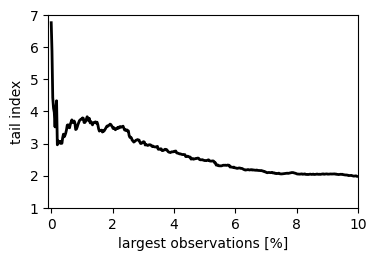

In [71]:
fig3, ax3 = plt.subplots(figsize=(4, 2.5))
ax3.plot(hill['obs_pc'], hill['tail'], color='black', linewidth=2)
ax3.set_xlim([-.1, 10])
ax3.set_ylim([1, 7])
ax3.set_ylabel('tail index')
ax3.set_xlabel('largest observations [%]')
plt.show()


In [79]:
hill_1 = hill[hill['obs_pc'] >= 1]
hill_2 = hill[hill['obs_pc'] >= 2]
hill_3 = hill[hill['obs_pc'] >= 3]
hill_5 = hill[hill['obs_pc'] >= 5]

h1 = round(hill_1['tail'].iloc[0], 4)
h2 = round(hill_2['tail'].iloc[0], 4)
h3 = round(hill_3['tail'].iloc[0], 4)
h5 = round(hill_5['tail'].iloc[0], 4)
h10 = round(hill['tail'].iloc[-1], 4)

print('Hill Index at 1, 2, 3, 5 and 10% level:')
print(h1,h2,h3,h5,h10)

Hill Index at 1, 2, 3, 5 and 10% level:
3.8002 3.4702 3.0578 2.4692 1.9809


### Autocorrelation
ac 
aac
plot
select empirical Modes


In [74]:
# calculate autocorrelations of returns and create data frames
lag = 100
ac = acf(asset.Returns.iloc[1:-1], nlags=lag)
aac = acf(abs(asset.Returns.iloc[1:-1]), nlags=lag)

print(' \nAuto-Correlation arrays created ...')
print('AC Start: ' + str(ac[0]) + ' | End: ' + str(ac[-1]))
print('AAC Start: ' + str(aac[0]) + ' | End: ' + str(aac[-1]))

 
Auto-Correlation arrays created ...
AC Start: 1.0 | End: 0.007003052010722585
AAC Start: 1.0 | End: -0.009302237910903878


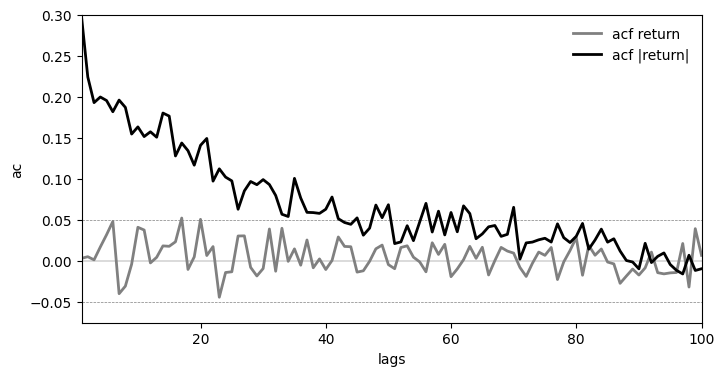

In [78]:
# Step 3
fig4, ax4 = plt.subplots(figsize=(8, 4))
ax4.hlines(y=0, xmin=1, xmax=100, linewidth=0.2, color='black')
ax4.hlines(y=0.05, xmin=1, xmax=100, linewidth=0.5, linestyle='dashed', color='grey')
ax4.hlines(y=-0.05, xmin=1, xmax=100, linewidth=0.5, linestyle='dashed', color='grey')
ax4.plot(ac, color='grey', linewidth=2, label='acf return')
ax4.plot(aac, color='black', linewidth=2, label='acf |return|')
ax4.set_xlim([1, lag])
ax4.set_ylim([-.075, .3])
ax4.set_ylabel('ac')
ax4.set_xlabel('lags')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels, loc='upper right', frameon=0)
plt.show()


In [83]:
aac_r1 = round(aac[1], 4)
aac_r2 = round(aac[2], 4)
aac_r3 = round(aac[3], 4)
aac_r6 = round(aac[6], 4)
aac_r12 = round(aac[12], 4)
aac_r25 = round(aac[25], 4)
aac_r50 = round(aac[50], 4)
aac_r100 = round(aac[100], 4)

print('Autocorrectaion of normalized Retunns at lag')
print('1, 2, 3, 6, 12, 25, 50, 100')
print(aac_r1,aac_r2,aac_r3,aac_r6,aac_r12,aac_r25,aac_r50,aac_r100)

Autocorrectaion of normalized Retunns at lag
1, 2, 3, 6, 12, 25, 50, 100
0.2976 0.2242 0.193 0.1819 0.1575 0.0977 0.0686 -0.0093


Combinded Plot

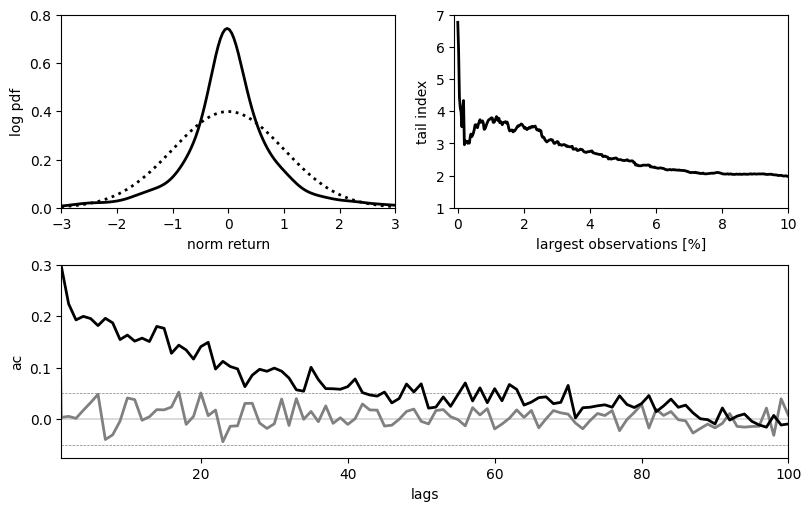

In [77]:
# Step 4
fig = plt.figure(figsize=(8, 5), constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)

# Recreate ax5
ax5_new = fig.add_subplot(gs[0, :1])
ax5_new.plot(x, y, linewidth=2, color='black', linestyle='dotted', label='std norm dist')
asset.normReturns.plot.kde(color='black', linewidth=2, label='btc returns', ax=ax5_new)
ax5_new.set_xlim([-3, 3])
ax5_new.set_ylim([0, 0.8])
ax5_new.set_ylabel('log pdf')
ax5_new.set_xlabel('norm return')

# Recreate ax3
ax3_new = fig.add_subplot(gs[0, 1:2])
ax3_new.plot(hill['obs_pc'], hill['tail'], color='black', linewidth=2)
ax3_new.set_xlim([-.1, 10])
ax3_new.set_ylim([1, 7])
ax3_new.set_ylabel('tail index')
ax3_new.set_xlabel('largest observations [%]')

# Recreate ax4
ax4_new = fig.add_subplot(gs[1, :])
ax4_new.hlines(y=0, xmin=1, xmax=100, linewidth=0.2, color='black')
ax4_new.hlines(y=0.05, xmin=1, xmax=100, linewidth=0.5, linestyle='dashed', color='grey')
ax4_new.hlines(y=-0.05, xmin=1, xmax=100, linewidth=0.5, linestyle='dashed', color='grey')
ax4_new.plot(ac, color='grey', linewidth=2, label='acf return')
ax4_new.plot(aac, color='black', linewidth=2, label='acf |return|')
ax4_new.set_xlim([1, lag])
ax4_new.set_ylim([-.075, .3])
ax4_new.set_ylabel('ac')
ax4_new.set_xlabel('lags')

plt.show()

## Empirical Moments

In [84]:
BTC_modes = dict(
    Distortion = round(D, 4),
    Volatility = round(V, 4),

    hl_1 = h1,
    hl_2 = h2,
    hl_3 = h3,
    hl_5 = h5,
    hl_10 = h10,

    aac_r1btc = aac_r1,
    aac_r2btc = aac_r2,
    aac_r3btc = aac_r3,
    aac_r6btc = aac_r6,
    aac_r12btc = aac_r12,
    aac_r25btc = aac_r25,
    aac_r50btc = aac_r50,
    aac_r100btc = aac_r100
)
BTC_modes

{'Distortion': 0.6685,
 'Volatility': 0.0269,
 'hl_1': 3.8002,
 'hl_2': 3.4702,
 'hl_3': 3.0578,
 'hl_5': 2.4692,
 'hl_10': 1.9809,
 'aac_r1btc': 0.2976,
 'aac_r2btc': 0.2242,
 'aac_r3btc': 0.193,
 'aac_r6btc': 0.1819,
 'aac_r12btc': 0.1575,
 'aac_r25btc': 0.0977,
 'aac_r50btc': 0.0686,
 'aac_r100btc': -0.0093}

B